<a href="https://colab.research.google.com/github/TobiBu/graddays/blob/main/day_5/notebooks/simple_orbit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First simple example: Explicit orbit integration

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Write a simple explicit integrator for a "Schiefer Wurf"

Given an initial position and velocity write a piece of pure numpy code that integrates the equation of motion for the "Schiefer Wurf" and solves the time evolution.

In [ ]:
# some definitions for the simulation
g = 9.81       # gravitational acceleration on Earth in m/s^2
vx = 10.0      # initial horizontal velovity
vy = 15.0      # initial upward velocity

t = 0.0        # starting time in seconds
x = 0.0        # starting horizontal position
y = 0.0        # starting vertical position

dt = 0.01      # time step size in seconds
tmax = 3.075     # when to stop the simulation
nstep = int(np.ceil(tmax/dt))   # how many time steps do we need?

x_arr = np.zeros(nstep)           # array for storing computed x positions
y_arr = np.zeros(nstep)           # array for storing computed y positions

In [ ]:
# the main loop
for i in np.arange(nstep):   # main loop over time steps
  x_arr[i] = x            # save current x position in array
  y_arr[i] = y            # save current y position in array

  x = x + vx*dt           # move projectile in x direction according to its velcocity
  y = y + vy*dt           # move projectile in y direction according to its velcocity

                          # no horizontal acceleration, hence vx unchanged
  vy = vy - g*dt          # change velocity in y driection due to Earth's gravity

  t = t + dt              # calculate new current time

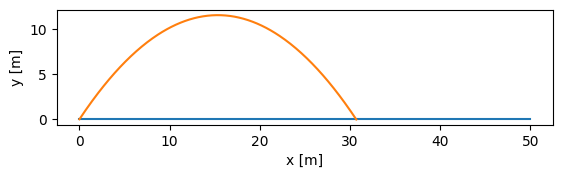

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(x_arr, y_arr)     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("y [m]")    # add y axis label
fig.show()                # show the figure

### Now convert to pure Jax code

this is as easy as replacing ```import numpy as np``` to ```import jax.numpy as jnp```

In [ ]:
import jax.numpy as jnp

In [ ]:
# some re-definitions for the simulation to start again from time zero
g = 9.81       # gravitational acceleration on Earth in m/s^2
vx = 10.0      # initial horizontal velovity
vy = 15.0      # initial upward velocity

t = 0.0        # starting time in seconds
x = 0.0        # starting horizontal position
y = 0.0        # starting vertical position

dt = 0.01      # time step size in seconds
tmax = 3.075     # when to stop the simulation
nstep = int(np.ceil(tmax/dt))   # how many time steps do we need?

In [ ]:
# redefine the arrays
x_arr = jnp.zeros(nstep)           # array for storing computed x positions
y_arr = jnp.zeros(nstep)           # array for storing computed y positions

Plain conversion will for some special cases not work due to JAX' static memory allocation. See error below.

In [ ]:
# redo the main loop in Jax
for i in jnp.arange(nstep):   # main loop over time steps
  x_arr[i] = x            # save current x position in array
  y_arr[i] = y            # save current y position in array

  x = x + vx*dt           # move projectile in x direction according to its velcocity
  y = y + vy*dt           # move projectile in y direction according to its velcocity

                          # no horizontal acceleration, hence vx unchanged
  vy = vy - g*dt          # change velocity in y driection due to Earth's gravity

  t = t + dt              # calculate new current time

TypeError: '<class 'jaxlib.xla_extension.ArrayImpl'>' object does not support item assignment. JAX arrays are immutable. Instead of ``x[idx] = y``, use ``x = x.at[idx].set(y)`` or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

re-initialize the arrays...

In [ ]:
# some re-definitions for the simulation to start again from time zero
g = 9.81       # gravitational acceleration on Earth in m/s^2
vx = 10.0      # initial horizontal velovity
vy = 15.0      # initial upward velocity

t = 0.0        # starting time in seconds
x = 0.0        # starting horizontal position
y = 0.0        # starting vertical position

dt = 0.01      # time step size in seconds
tmax = 3.075     # when to stop the simulation
nstep = int(np.ceil(tmax/dt))   # how many time steps do we need?

# redefine the arrays
x_arr = jnp.zeros(nstep)           # array for storing computed x positions
y_arr = jnp.zeros(nstep)           # array for storing computed y positions

In [ ]:
# fix the first Jax error due to static arrays
# redo the main loop in Jax
for i in jnp.arange(nstep):   # main loop over time steps
  x_arr = x_arr.at[i].set(x)            # save current x position in array
  y_arr = y_arr.at[i].set(y)            # save current y position in array

  x = x + vx*dt           # move projectile in x direction according to its velcocity
  y = y + vy*dt           # move projectile in y direction according to its velcocity

                          # no horizontal acceleration, hence vx unchanged
  vy = vy - g*dt          # change velocity in y driection due to Earth's gravity

  t = t + dt              # calculate new current time

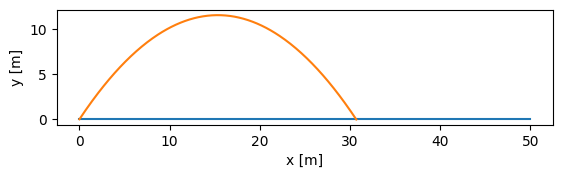

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(x_arr, y_arr)     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("y [m]")    # add y axis label
fig.show()                # show the figure

### How do we access now the gradient?

First, we need a function, $f$, instead of a standalone loop. in the end we want to evaluate $\frac{df}{dt}$

In [ ]:
!pip install jaxtyping

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
import jaxtyping
from jaxtyping import Array, Float

In [ ]:
# some definitions for the simulation
g = 9.81       # gravitational acceleration on Earth in m/s^2
vx = 10.0      # initial horizontal velovity
vy = 15.0      # initial upward velocity
x = 0.0        # starting horizontal position
y = 0.0        # starting vertical position

dt = 0.01      # time step size in seconds
tmax = 3.075     # when to stop the simulation
nstep = int(np.ceil(tmax/dt))   # how many time steps do we need?

In [ ]:
def orbit(velocity: Float[Array, "2 1"], position: Float[Array, "2 1"], dt: Float, nstep: Float, g: Float) -> Float[Array, "nstep 2 1"]:
    """Calculate the orbit of a projectile in 2D space.

    Args:
        velocity: initial velocity of the projectile in m/s
        position: initial position of the projectile in m
        dt: time step size in seconds
        nstep: number of time steps to simulate
        g: gravitational acceleration in m/s^2

    Returns:
        Array: computed positions of the projectile in m
    """

    position_arr = jnp.zeros((nstep, 2))           # array for storing computed positions

    t = 0.0        # starting time in seconds
    x = position[0]        # starting horizontal position
    y = position[1]        # starting vertical position

    for i in jnp.arange(nstep):   # main loop over time steps
        position_arr = position_arr.at[i,0].set(x)            # save current x position in array
        position_arr = position_arr.at[i,1].set(y)            # save current y position in array

        x = x + velocity[0]*dt           # move projectile in x direction according to its velcocity
        y = y + velocity[1]*dt           # move projectile in y direction according to its velcocity

        # no horizontal acceleration, hence vx unchanged
        velocity = velocity.at[1].set(velocity[1] - g*dt)          # change velocity in y driection due to Earth's gravity

        t = t + dt              # calculate new current time

    return position_arr

now let's call the function and get the orbit.

In [ ]:
position = orbit(jnp.array([vx, vy]), jnp.array([x, y]), dt, nstep, g)

Let's plot for sanity check...
should look like the plot above produced in pure numpy!

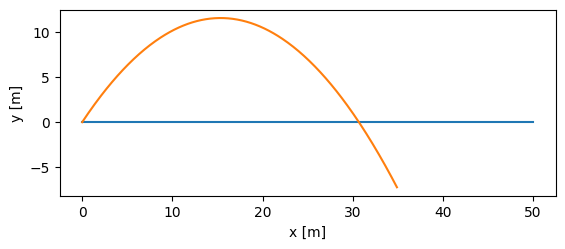

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(position[:,0], position[:,1])     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("y [m]")    # add y axis label
fig.show()                # show the figure

in order to calculate the gradient, we need ```jax.grad```

In [ ]:
from jax import grad

Let's get the gradient of our orbit function $\frac{df}{dt}$

```grad``` will result in a function that has the same signature as the original function $f$

In [ ]:
grad_orbit = grad(orbit, argnums=(4))

In [ ]:
grad_orbit(jnp.array([vx, vy]), jnp.array([x, y]), dt, nstep, g)

TypeError: Gradient only defined for scalar-output functions. Output had shape: (350, 2).

as we can see, plain gradient evaluation of our orbit function doesn't work. Why so?

Let's take a closer look at the error message:

```TypeError: Gradient only defined for scalar-output functions. Output had shape: (350, 2).```

Our function ```orbit``` does not produce a scalar value! It calculates an entire array of $x,y$ positions for several timesteps.

So, what shall we do?

Luckily, Jax got you covered with ```jax.jacfwd``` to circumvent the timestep issue.

In [ ]:
import jax
g_sens = jax.jacfwd(orbit, argnums=4)(jnp.array([vx, vy]), jnp.array([x, y]), dt, nstep, g)

In [ ]:
g_sens.shape

(350, 2)

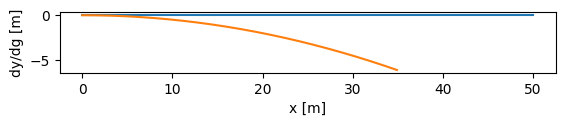

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(position[:,0], g_sens[:,1])     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("dy/dg [m]")    # add y axis label
fig.show()                # show the figure

What does this result tells us?

The gradient of our orbit calculation with respect to the gravitational constant is negative for all times $t$, or better all $x$. And actually, it becomes more negative for larger $x$ corresponding to larger $t$.

This makes sense! The larger $g$, the stronger the gravitational pull downwards and hence the negative influence on $y$. And since $x(t)$ the larger influence at larger $x$ due to larger times $t$.

Let's evaluate the gradient with respect to initial velocity $v$

Note: here we use the ```lambda``` notation since velocity and positions are arrays and a simple ```argnum``` specification will not work.

In [ ]:
v_sens_y = jax.jacfwd(lambda v: orbit(jnp.array([vx, v]), jnp.array([x, y]), dt, nstep, g))(vy)
v_sens_x = jax.jacfwd(lambda v: orbit(jnp.array([v, vy]), jnp.array([x, y]), dt, nstep, g))(vx)

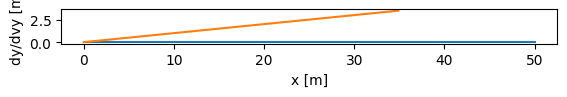

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(position[:,0], v_sens_y[:,1])     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("dy/dvy [m]")    # add y axis label
fig.show()                # show the figure

Looks good! The larger the $y$-component of the initial throw, the larger $y$.

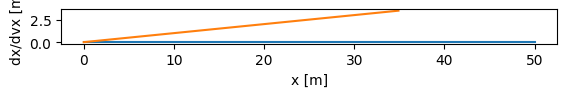

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(position[:,0], v_sens_x[:,0])     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("dx/dvx [m]")    # add y axis label
fig.show()                # show the figure

In [ ]:
x_sens_x = jax.jacfwd(lambda pos: orbit(jnp.array([vx, vy]), jnp.array([pos, y]), dt, nstep, g))(x)
y_sens_y = jax.jacfwd(lambda pos: orbit(jnp.array([vx, vy]), jnp.array([x, pos]), dt, nstep, g))(y)

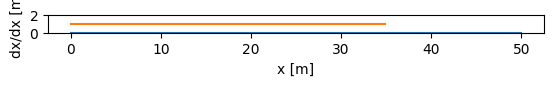

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(position[:,0], x_sens_x[:,0])     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("dx/dx [m]")    # add y axis label
ax.set_ylim(0,2)
fig.show()                # show the figure

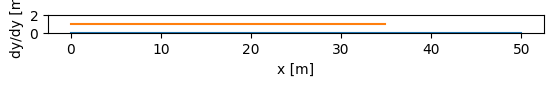

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes

ax.plot([0,50],[0,0])     # make horizontal line to show the ground
ax.plot(position[:,0], y_sens_y[:,1])     # plot projectile path

ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("x [m]")    # add x axis label
ax.set_ylabel("dy/dy [m]")    # add y axis label
ax.set_ylim(0,2)
fig.show()                # show the figure

# Now let's try something more useful: Solving inverse problems

let's try to solve some inverse problems where we like to find the best matching gravitational constant for some observation $x_\rm{final},y_{\rm{final}}$ for fixed starting point $x_i,y_i$ and starting velocity $v_{x_i},v_{y_i}$

Our naive implementation from above is super slow and super inefficient. If you want to experience it yourself, try the code below ($\sim45$ minutes for optimization). If you want the more efficient option ($\sim2$ seconds), scroll down...

In [ ]:
# Let's choose some arbitrary final trajectory
g = 2.5         # gravitational acceleration on Earth in m/s^2
vx = 10.0      # initial horizontal velovity
vy = 15.0      # initial upward velocity
x = 0.0        # starting horizontal position
y = 0.0        # starting vertical position

dt = 0.01      # time step size in seconds
tmax = 5.075     # when to stop the simulation
nstep = int(np.ceil(tmax/dt))   # how many time steps do we need?

In [ ]:
position_final = orbit(jnp.array([vx, vy]), jnp.array([x, y]), dt, nstep, g)

Let's time our naive implementation...

In [ ]:
timeit orbit(jnp.array([vx, vy]), jnp.array([x, y]), dt, nstep, g)

1.79 s ± 281 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


now let's do a more effective implementation.

the inefficient part is the for loop!
We will make use jax.lax.scan instead of the for loop.
Because of jax static memory allocation, this needs some special syntax.
So let's rewrite our orbit function.

We will make us of ```jax.lax.scan``` instead of the for loop and in order to make use of jit compilation we need to get rid of run time dependences so we move the calculation of ```nstep``` inside the function.

Note though: there is also a ```jax.lax.for_i``` loop and you could use static arguments to still pass ```nsteps``` to the function.

In [ ]:
@jax.jit
def new_orbit(velocity: Float[Array, "2 1"], position: Float[Array, "2 1"], g: Float) -> Float[Array, "nstep 2 1"]:
    """Calculate the orbit of a projectile in 2D space.

    Args:
        velocity: initial velocity of the projectile in m/s
        position: initial position of the projectile in m
        dt: time step size in seconds
        tmax: number of time steps to simulate
        g: gravitational acceleration in m/s^2

    Returns:
        Array: computed positions of the projectile in m
    """
    dt = 0.01      # time step size in seconds
    tmax = 3.075     # when to stop the simulation
    nstep = int(np.ceil(tmax/dt))
    position_arr = jnp.zeros((nstep, 2))           # array for storing computed positions

    t = 0.0        # starting time in seconds
    x = position[0]        # starting horizontal position
    y = position[1]        # starting vertical position
    vx = velocity[0]
    vy = velocity[1]

    def body(carry, _):
        x, y, vx, vy  = carry
        x = x + vx*dt
        y = y + vy*dt
        vy = vy - g*dt
        return (x, y, vx, vy), (x, y, vx, vy)

    final_state, state_array = jax.lax.scan(body, (x,y, vx, vy), xs=None ,length=nstep)

    return final_state, state_array

In [ ]:
# Let's choose some arbitrary final trajectory
g = 2.5         # gravitational acceleration on Earth in m/s^2
vx = 10.0      # initial horizontal velovity
vy = 15.0      # initial upward velocity
x = 0.0        # starting horizontal position
y = 0.0        # starting vertical position

dt = 0.01      # time step size in seconds
tmax = 5.075     # when to stop the simulation
nstep = int(np.ceil(tmax/dt))   # how many time steps do we need?

Let's re-time this new version.

In [ ]:
timeit _, all_final_positions = new_orbit(jnp.array([vx, vy]), jnp.array([x, y]), g)

2.39 ms ± 1.21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


wow, 1.79s vs 2.39ms thats about 750 times faster...

Now back to our optimization problem...

Now we define a loss function using our optimized ```new_orbit``` function.

here simply the sum of the absolute differences between trajectories.
Could think of something better maybe?

In [ ]:
# define some loss

def loss(g):
  _, position = new_orbit(jnp.array([vx, vy]), jnp.array([x, y]), g)
  return jnp.sum(jnp.abs(all_final_positions[0] - position[0]) + jnp.abs(all_final_positions[1] - position[1]))

with the loss function we set up our optimizer and gradient descent function

In [ ]:
# Let's setup the optimizer
import optax

def gradient_descent(func, g_init, learning_rate=.1, tol=0.001, max_iter=2000):
  glist = []
  g = g_init
  loss_list = []
  glist.append(g)

  optimizer = optax.adam(learning_rate=learning_rate)
  optimizer_state = optimizer.init(g)

  for _ in range(max_iter):
    # Compute the function value and its gradient
    loss, f_grad = jax.value_and_grad(func)(g)
    loss_list.append(loss)

    # Update the parameter
    updates, optimizer_state = optimizer.update(f_grad, optimizer_state)
    g = optax.apply_updates(g, updates)
    glist.append(g)

    print(g)

    # Check convergence
    if jnp.linalg.norm(updates) < tol:
        break

  return g, glist, loss_list


For some stupid reason we print the current gravitational constant.
Note: this print statement slows us donw a lot. For performance, we would remove it...

In [ ]:
initial_guess1 = 15.
g1, glist1, loss_list1 = gradient_descent(loss, initial_guess1)

14.900001
14.800001
14.700002
14.600002
14.500003
14.400003
14.300004
14.200005
14.100005
14.000006
13.900006
13.800007
13.700007
13.600008
13.500009
13.400009
13.30001
13.20001
13.100011
13.000011
12.900012
12.800013
12.700013
12.600014
12.500014
12.400015
12.300015
12.200016
12.100017
12.000017
11.900018
11.800018
11.700019
11.600019
11.50002
11.400021
11.300021
11.200022
11.100022
11.000023
10.900023
10.800024
10.700025
10.600025
10.500026
10.400026
10.300027
10.200027
10.100028
10.000029
9.900029
9.80003
9.70003
9.600031
9.500031
9.400032
9.300033
9.200033
9.100034
9.000034
8.900035
8.800035
8.700036
8.600037
8.500037
8.400038
8.300038
8.200039
8.1000395
8.00004
7.9000406
7.800041
7.700042
7.6000423
7.500043
7.4000435
7.300044
7.2000446
7.100045
7.000046
6.9000463
6.800047
6.7000475
6.600048
6.5000486
6.400049
6.30005
6.2000504
6.100051
6.0000515
5.900052
5.8000526
5.700053
5.600054
5.5000544
5.400055
5.3000555
5.200056
5.1000566
5.000057
4.900058
4.8000584
4.700059
4.6000595
4.500

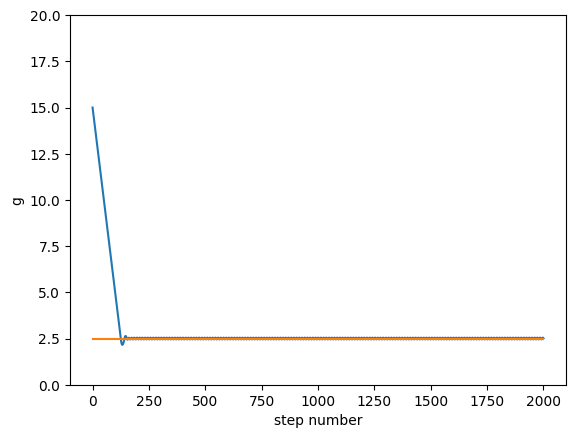

In [ ]:
# --- now make a plot ---

fig = plt.figure()            # open figure
ax = fig.add_subplot(111) # create axes
step = np.linspace(0,len(glist1),len(glist1))

ax.plot(step, glist1)     # plot projectile path

ax.plot([0,2000],[2.5,2.5])     # make horizontal line to show the ground truth
#ax.set_aspect("equal")    # use same scale on x and y axis
ax.set_xlabel("step number")    # add x axis label
ax.set_ylabel("g")    # add y axis label
ax.set_ylim(0,20)
fig.show()                # show the figure

# Let's do some optimization: Can we find the optimal throwing angle to maximise distance for fixed throwing velocity and starting point

Now, can you reformulate the orbit function to use a throwing angle instead of explicit $(v_x,v_y)$ and optimize for the optimal throwing angle?
Remember, theoretically it should be $45^°$.

# Now, let's move on to add a drag force to the throw.

Can we include a neural network to fit for this unknown drag force?

Which steps would you have to follow to make this happen?